# 라이브러리 불러오기

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import openpyxl
import collections

from sklearn.decomposition import PCA
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import os

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

# 비선형 상호정보량

- 독립변수와 종속변수 사이의 비선형 상관관계를 파악하기 위한 상호정보량을 계산해보았으나 유의한 결과가 나오진 않았음

# 회귀분석

In [2]:
import pandas as pd
import xlwings as xw
df = xw.Book('ALL_DATA5.xlsx')
df = df.sheets(1).used_range.options(pd.DataFrame).value
df = df.reset_index()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182156 entries, 0 to 182155
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              182156 non-null  object 
 1   DATE              182156 non-null  object 
 2   업종                122767 non-null  object 
 3   시가총액              103029 non-null  float64
 4   수정주가(보통)          103029 non-null  float64
 5   수정PBR             89067 non-null   float64
 6   총자산               102119 non-null  float64
 7   총부채               102119 non-null  float64
 8   총차입부채             102116 non-null  float64
 9   총자본               102119 non-null  float64
 10  매출액               108919 non-null  float64
 11  매출총이익             108919 non-null  float64
 12  영업이익              108919 non-null  float64
 13  지배주주순이익           108919 non-null  float64
 14  EBITDA            109291 non-null  float64
 15  현금흐름(보통)          108916 non-null  float64
 16  영업활동으로인한현금흐름      85

In [4]:
df_test = pd.pivot_table(df, index='DATE', columns="Name", values=['매출액','영업이익','매출총이익','EBITDA','현금흐름(보통)','지배주주순이익','시가총액'])

In [5]:
df_test['시가총액'] = df_test['시가총액'].shift(-1)

In [6]:
df_feature = df_test.copy()
values=['매출액','영업이익','매출총이익','EBITDA','현금흐름(보통)','지배주주순이익','시가총액']

## TTM으로 변환
for stock in values[:-1]:
    df_feature[stock] =  df_feature[stock].rolling(window=4).sum() 


In [7]:
df_f = df_feature.unstack().reset_index()

In [8]:
df_f = pd.pivot_table(df_f,index = ['Name','DATE'] , columns = "level_0",values = 0,dropna = False).reset_index()

In [9]:
df_reg = df_f.replace(0,np.nan).dropna(axis=0)

In [11]:
df_corr = pd.DataFrame(df_reg.corr()['시가총액'].sort_values(ascending = False) , columns = ['시가총액'])
df_corr.style.background_gradient(cmap='viridis')

,시가총액
level_0,
시가총액,1.000000
현금흐름(보통),0.917743
EBITDA,0.916414
영업이익,0.888249
지배주주순이익,0.874533
매출총이익,0.874341
매출액,0.806571


In [12]:
df_reg

level_0,Name,DATE,EBITDA,매출액,매출총이익,시가총액,영업이익,지배주주순이익,현금흐름(보통)
3,3S,20104Q,4.453583e+09,2.007460e+10,5.382213e+09,1.503020e+11,2.462501e+09,1.879642e+09,2.423392e+09
4,3S,20111Q,4.527040e+09,2.083461e+10,5.584933e+09,3.676200e+11,2.524110e+09,1.272340e+09,1.827938e+09
5,3S,20112Q,4.512393e+09,2.205920e+10,5.716986e+09,9.804350e+11,2.486689e+09,1.695075e+09,2.273447e+09
6,3S,20113Q,5.186456e+09,2.200989e+10,6.135211e+09,8.007540e+11,2.731197e+09,1.613312e+09,2.621239e+09
7,3S,20114Q,4.214228e+09,2.200989e+10,6.135211e+09,6.811220e+11,2.731197e+09,1.613312e+09,2.621239e+09
...,...,...,...,...,...,...,...,...,...
154122,힘스,20213Q,9.496973e+08,5.919484e+10,1.636453e+10,1.114260e+11,-5.538367e+08,6.952570e+08,2.198791e+09
154123,힘스,20214Q,-2.794112e+09,5.058420e+10,1.327535e+10,1.032810e+11,-4.371187e+09,-4.413924e+08,1.135683e+09
154124,힘스,20221Q,-3.087911e+09,4.903777e+10,1.135008e+10,7.092800e+10,-4.687335e+09,-1.899349e+09,-2.999254e+08
154125,힘스,20222Q,-6.740493e+09,4.382824e+10,9.846871e+09,7.126700e+10,-8.363693e+09,-4.028415e+09,-2.405215e+09


<AxesSubplot:xlabel='level_0', ylabel='level_0'>

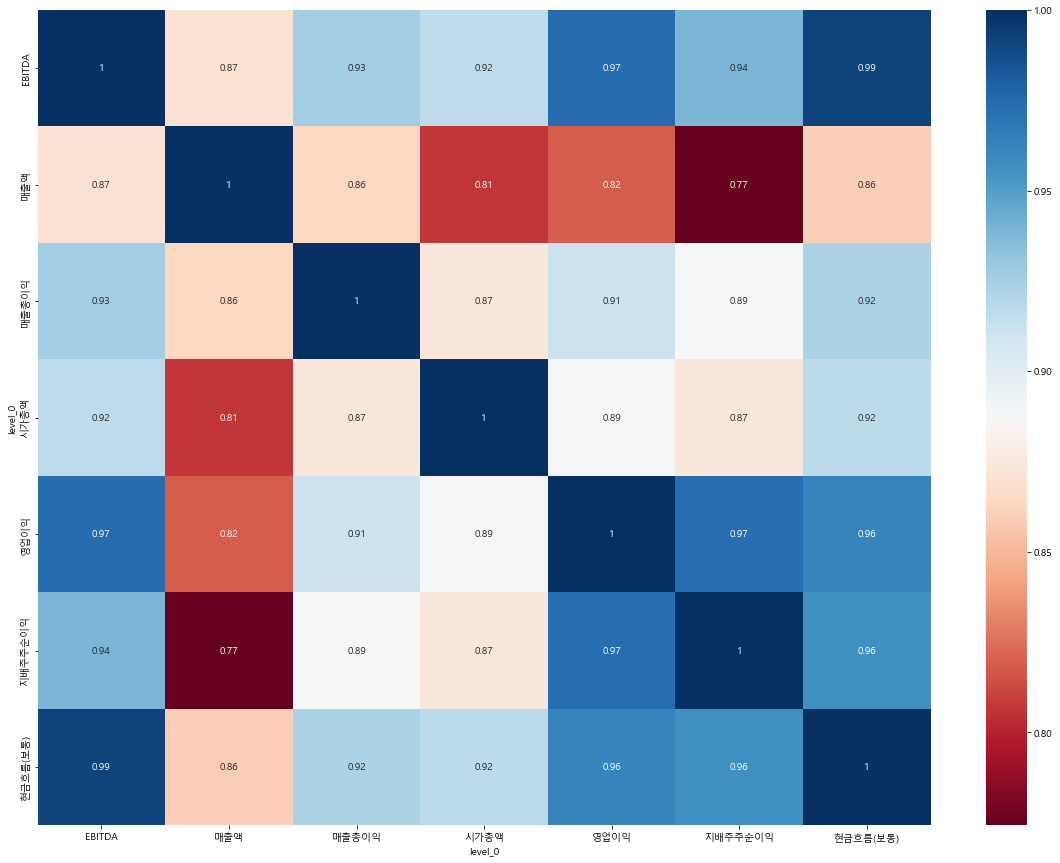

In [13]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.heatmap(df_reg.corr(), annot = True,cmap = "RdBu")

In [14]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91840 entries, 3 to 154126
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      91840 non-null  object 
 1   DATE      91840 non-null  object 
 2   EBITDA    91840 non-null  float64
 3   매출액       91840 non-null  float64
 4   매출총이익     91840 non-null  float64
 5   시가총액      91840 non-null  float64
 6   영업이익      91840 non-null  float64
 7   지배주주순이익   91840 non-null  float64
 8   현금흐름(보통)  91840 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.0+ MB


In [15]:
X = df_reg[['매출액','지배주주순이익','매출총이익']]
y = df_reg['시가총액']

In [16]:
X = df_reg.drop(['Name','DATE','시가총액'],axis=1)
y = df_reg['시가총액']

In [17]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# 학습데이터 , 테스트 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 156)

In [18]:
import statsmodels.api as sm

model = sm.OLS(endog = y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   시가총액   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.418e+05
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:34:42   Log-Likelihood:            -2.7587e+06
No. Observations:               91840   AIC:                         5.518e+06
Df Residuals:                   91834   BIC:                         5.518e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EBITDA        95.2798      0.547    174.096      0.000      94.207      96.352
매출액            0.0644      0.003     23.083      0.000       0.059       0.070
매출총이익          0.5029      0.011     47.652      0.000       0.482       0.524
영업이익         -95.8759      0.556   -172.338      0.000     -96.966     -94.785
지배주주순이익       95.5683      0.557    171.517      0.000      94.476      96.660
현금흐름(보통)     -91.9562      0.555   -165.586      0.000     -93.045     -90.868
==============================================================================
Omnibus:                   182764.376   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5265069468.555
Skew:                          15.198   Prob(JB):                         0.00
Kurtosis:                    1175.589   Cond. No.                         979.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다중공선성 확인

In [19]:
earning = ['매출액','지배주주순이익','매출총이익']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_reg[earning].values, i) for i in range(len(earning))]
vif["features"] = earning
vif

,VIF Factor,features
0,3.897114,매출액
1,4.672883,지배주주순이익
2,7.423503,매출총이익


단계적선택법 : 해당 변수들끼리 다중공선성이 높아 사용 X

In [20]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X = df_reg[['매출액','영업이익','지배주주순이익','현금흐름(보통)','EBITDA','매출총이익']]
y = df_reg['시가총액']
# 학습데이터 , 테스트 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 156)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs_fss = SFS(LinearRegression(),
             k_features=(3), # 몇 개의 변수를 추출할지
             forward=True, # True는 forward, False는 backward
             floating=False, # Stepwise는 True
             scoring=None, # regression에서는 default none 값
             cv=5) # k-fold cross-validation
sfs_fss.fit(X, y)

sfs_fss.k_feature_names_

('현금흐름(보통)', 'EBITDA', '매출총이익')

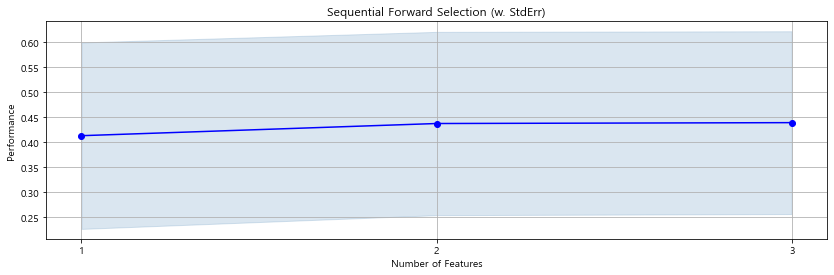

In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs_fss.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

각각의 데이터프레임에서 사용해야할 변수만 따로 지정하여 통합 데이터프레임 구축

# 프로젝트

## 구분 데이터

In [43]:
df_target = pd.read_csv('성장주분석리스트.csv',encoding = 'cp949',index_col = 0)
df_target

,gubun,stock_name,stock_code
0,급상승,CJ제일제당,97950
1,급상승,DB하이텍,990
2,급상승,DL건설,1880
3,급상승,FSN,214270
4,급상승,GST,83450
...,...,...,...
1049,하락세,한솔홀딩스,4150
1050,하락세,현대두산인프라코어,42670
1051,하락세,화인베스틸,133820
1052,하락세,효성,4800


## 급상승이며 지속상승인 종목들에 대해 급상승으로 태깅

In [44]:
## 급상승인 종목이름
drop_list = df_target[df_target['gubun'] == '급상승']['stock_name'].values 


## 지속상승이면서 급상승인 경우 급상승으로만 태깅
def label(df):
    if  df['gubun'] == '지속상승' and  df['stock_name'] in drop_list:
        return 1
    else:
        return 0
df_target['target'] = df_target.apply(label,axis=1)
df_target = df_target[df_target['target'] == 0].drop('target',axis =1)



## 재무제표 데이터와 구분 데이터 결합

In [45]:
import pandas as pd
import xlwings as xw
df = xw.Book('All_DATA5.xlsx')
df = df.sheets(1).used_range.options(pd.DataFrame).value

df = df.reset_index()

In [46]:
df = pd.merge(df,df_target,left_on = 'Name' , right_on = 'stock_name',how = 'left').drop(['stock_name','stock_code'],axis=1)
df['gubun'].fillna('x',inplace = True)

In [47]:
df['gubun'].value_counts()

x       135720
성장둔화     16536
지속상승     14924
급상승       7696
하락세       4108
상승전환      3172
Name: gubun, dtype: int64

## 파생변수 생성(TTM,YOY)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182156 entries, 0 to 182155
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              182156 non-null  object 
 1   DATE              182156 non-null  object 
 2   업종                122767 non-null  object 
 3   시가총액              103029 non-null  float64
 4   수정주가(보통)          103029 non-null  float64
 5   수정PBR             89067 non-null   float64
 6   총자산               102119 non-null  float64
 7   총부채               102119 non-null  float64
 8   총차입부채             102116 non-null  float64
 9   총자본               102119 non-null  float64
 10  매출액               108919 non-null  float64
 11  매출총이익             108919 non-null  float64
 12  영업이익              108919 non-null  float64
 13  지배주주순이익           108919 non-null  float64
 14  EBITDA            109291 non-null  float64
 15  현금흐름(보통)          108916 non-null  float64
 16  영업활동으로인한현금흐름      85

In [49]:
df

,Name,DATE,업종,시가총액,수정주가(보통),수정PBR,총자산,총부채,총차입부채,총자본,...,총자산/총자본,현금및현금성자산구성비율,영업이익률_TTM,EBITDA마진율_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),매출원가율,판관비율,gubun
0,삼성전자,20101Q,반도체,1.327752e+14,16360.0,1.74,1.150958e+14,3.985685e+13,8.251037e+12,7.523895e+13,...,152.97,8.02,10.22,17.96,9.13,NaN,NaN,66.43,21.92,성장둔화
1,삼성전자,20102Q,반도체,1.259972e+14,15480.0,1.53,1.256767e+14,4.398010e+13,1.036686e+13,8.169656e+13,...,153.83,6.87,11.29,18.78,10.09,NaN,NaN,64.73,22.86,성장둔화
2,삼성전자,20103Q,반도체,1.271698e+14,15540.0,1.47,1.322299e+14,4.667139e+13,1.101383e+13,8.555847e+13,...,154.55,8.05,11.34,18.55,10.19,NaN,NaN,64.67,23.52,성장둔화
3,삼성전자,20104Q,반도체,1.546060e+14,18980.0,1.73,1.342887e+14,4.493965e+13,1.077537e+13,8.934909e+13,...,150.30,7.29,10.75,18.12,10.22,13.49,20.37,69.54,22.98,성장둔화
4,삼성전자,20111Q,반도체,1.515539e+14,18640.0,1.67,1.365322e+14,4.503340e+13,1.154779e+13,9.149875e+13,...,149.22,8.58,9.80,17.22,9.24,12.23,18.22,70.45,22.00,성장둔화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182151,SNK,20214Q,소프트웨어,4.475630e+11,21250.0,1.87,2.675143e+11,2.724878e+10,3.875410e+09,2.402656e+11,...,111.34,69.46,6.75,16.23,-16.27,1.52,-3.98,25.02,66.65,x
182152,SNK,20221Q,소프트웨어,4.001740e+11,19000.0,1.67,2.794432e+11,3.881410e+10,1.429174e+10,2.406291e+11,...,116.13,62.36,7.96,16.93,-5.99,2.02,-1.72,20.76,84.99,x
182153,SNK,20222Q,소프트웨어,7.782340e+11,36950.0,3.22,2.722610e+11,3.028472e+10,5.684088e+09,2.419763e+11,...,112.52,68.42,6.58,15.31,-6.71,1.71,-1.95,26.19,82.86,x
182154,SNK,20223Q,소프트웨어,7.813930e+11,37100.0,3.30,2.643847e+11,2.714679e+10,4.852180e+09,2.372379e+11,...,111.44,63.84,2.23,10.48,0.20,0.60,0.06,14.97,72.03,x


In [50]:
def ttm(df,col):
    var = pd.pivot_table(df, index='DATE', columns="Name", values=col).rolling(window=4).sum()
    df_v = var.unstack().reset_index().rename(columns = {0 : col+'_TTM'})
    df = pd.merge(df,df_v,on = ['Name','DATE'], how = 'left')
    
    return df

def yoy(df,col):
    var = pd.pivot_table(df, index = 'DATE', columns = "Name" , values = col)
    for stock in var.columns:
        var[stock] =  (var[stock] - var[stock].shift(4))/abs(var[stock].shift(4))
    df_v = var.unstack().reset_index().rename(columns = {0 : col+'증가율'})
    df = pd.merge(df,df_v,on = ['Name','DATE'], how = 'left')
    
    return df

In [51]:
for i in ['매출액','영업이익','매출총이익','EBITDA','현금흐름(보통)','지배주주순이익','영업활동으로인한현금흐름','투자활동으로인한현금흐름','재무활동으로인한현금흐름']:
    df = ttm(df,i)

In [52]:
for i in ['매출액_TTM','영업이익_TTM','매출총이익_TTM','EBITDA_TTM','지배주주순이익_TTM','총자본','총자산','총부채','수정EPS']:
    df = yoy(df,i)

In [53]:
df['차입부채/영업이익'] = (df['총차입부채']/df['영업이익_TTM'])*100
df['현금흐름/매출액'] = (df['현금흐름(보통)_TTM']/df['매출액_TTM'])*100
df['매출총이익률_TTM'] = (df['매출총이익_TTM']/df['매출액_TTM'])*100
df['총자산회전율_TTM'] = (df['매출액_TTM']/df['총자산'])*100
df['총부채회전율_TTM'] = (df['매출액_TTM']/df['총부채'])*100
df['총자본회전율_TTM'] = (df['매출액_TTM']/df['총자본'])*100
df['영업활동현금흐름'] = (df['영업활동으로인한현금흐름_TTM']/df['현금흐름(보통)_TTM'])*100
df['재무활동현금흐름'] = (df['재무활동으로인한현금흐름_TTM']/df['현금흐름(보통)_TTM'])*100
df['투자활동현금흐름'] = (df['투자활동으로인한현금흐름_TTM']/df['현금흐름(보통)_TTM'])*100

In [54]:
df.columns

Index(['Name', 'DATE', '업종', '시가총액', '수정주가(보통)', '수정PBR', '총자산', '총부채',
       '총차입부채', '총자본', '매출액', '매출총이익', '영업이익', '지배주주순이익', 'EBITDA', '현금흐름(보통)',
       '영업활동으로인한현금흐름', '투자활동으로인한현금흐름', '재무활동으로인한현금흐름', '수정EPS', '수정BPS',
       '수정SPS', '수정CFPS', '수정PER_TTM', '부채비율', '총자산/총자본', '현금및현금성자산구성비율',
       '영업이익률_TTM', 'EBITDA마진율_TTM', '지배주주순이익률_TTM', 'ROA(영업이익_TTM)',
       'ROE(지배주주순이익_TTM)', '매출원가율', '판관비율', 'gubun', '매출액_TTM', '영업이익_TTM',
       '매출총이익_TTM', 'EBITDA_TTM', '현금흐름(보통)_TTM', '지배주주순이익_TTM',
       '영업활동으로인한현금흐름_TTM', '투자활동으로인한현금흐름_TTM', '재무활동으로인한현금흐름_TTM',
       '매출액_TTM증가율', '영업이익_TTM증가율', '매출총이익_TTM증가율', 'EBITDA_TTM증가율',
       '지배주주순이익_TTM증가율', '총자본증가율', '총자산증가율', '총부채증가율', '수정EPS증가율', '차입부채/영업이익',
       '현금흐름/매출액', '매출총이익률_TTM', '총자산회전율_TTM', '총부채회전율_TTM', '총자본회전율_TTM',
       '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182156 entries, 0 to 182155
Data columns (total 62 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              182156 non-null  object 
 1   DATE              182156 non-null  object 
 2   업종                122767 non-null  object 
 3   시가총액              103029 non-null  float64
 4   수정주가(보통)          103029 non-null  float64
 5   수정PBR             89067 non-null   float64
 6   총자산               102119 non-null  float64
 7   총부채               102119 non-null  float64
 8   총차입부채             102116 non-null  float64
 9   총자본               102119 non-null  float64
 10  매출액               108919 non-null  float64
 11  매출총이익             108919 non-null  float64
 12  영업이익              108919 non-null  float64
 13  지배주주순이익           108919 non-null  float64
 14  EBITDA            109291 non-null  float64
 15  현금흐름(보통)          108916 non-null  float64
 16  영업활동으로인한현금흐름      85

## 전처리

매출액,지배주주순이익,매출총이익이 0인 값을 nan으로 대체(증가율을 구하는데 inf의 문제가 발생 또한 이익이 0인 경우는 이상치로 생각후 제외)

In [56]:
def increase_rate(df):
    """
    TTM증가율 계산
    """
    for stock in df.columns:
        df[stock] = (df[stock] - df[stock].shift(1))/abs(df[stock].shift(1))
    df.drop(drop_date,axis =0, inplace = True) 
    df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
    return df

def process(df):
    """
    IQR 방식으로 이익성장레이블링 기준 설정
    """
    df_des = pd.DataFrame(df.unstack(),columns = ['value'])
    q3 = df_des.quantile(0.75).value
    q1 = df_des.quantile(0.25).value
    IQR = q3 - q1
    outlier_upper = q3+(1.5*IQR)
    outlier_lower = q1-(1.5*IQR)
    
    df = df.applymap(lambda x : labeled(x,outlier_upper,q3,q1,outlier_lower))
    return df

def labeled(row,outlier_upper,q3,q1,outlier_lower):
    """
    이익성장레이블링 : 기초통계량을 통해 이익지표ttm의 증가율이
    outlier_upper보다 크면 5 / 
    outlier_upper ~ q3 : 2 / 
    q3~ 0 : 1 / 
    0 ~ q1 = -1 / 
    q1 ~ outlier_lower : -2 /
    outlier_lower보다 작으면 -5
    """
    try:
        if row.isna():
            return np.nan
    except:
        
        if row>= outlier_upper:
            return 5
        elif row >= q3:
            return 2
        elif row >= 0:
            return 1
        elif row >= q1:
            return -1
        elif row >= outlier_lower:
            return -2
        else: 
            return -5
        
def cluster_naming(df1,df2):
    """
    첫분기, 중간분기, 마지막분기 값을 기준으로 추세를 매겨 성장레이블링 지정
    """
    for i in range(4):
        a = df1[i].mean(axis=1)[0]
        b = df1[i].mean(axis=1)[len(df1.index)//2]
        c = df1[i].mean(axis=1)[-1]
        
        if a>b>c:
            df2['cluster'].replace(i,'하락세',inplace =True)
        elif a<b<c:
            df2['cluster'].replace(i,'지속상승',inplace =True)
        elif a>b<c:
            df2['cluster'].replace(i,'상승전환',inplace =True)
        else:
            df2['cluster'].replace(i,'하락전환',inplace =True)
    
    return df2

def result_test(df,date):
    """
    군집화 첫분기를 기준으로 SMB, HML 변수 생성
    """
    value_group = df[df['DATE'] == date][['Name','시가총액','수정PBR']]
    value_group = value_group.replace('N/A',np.nan)
    drop_list = value_group[value_group['수정PBR'].isnull()]['Name'].unique()
    value_group = value_group.dropna(axis=0)
    
    for i in drop_list:
        df = df.loc[~df['Name'].isin(drop_list)]
        
        
    for i in drop_list:
        value_group = value_group.loc[~value_group['Name'].isin(drop_list)]
    
    value_group['SMB'] = value_group['시가총액'].apply(lambda x : 'S' if x <= value_group['시가총액'].median()
                                                        else 'B')
    value_group['HML'] = value_group['수정PBR'].apply(lambda x : 'L' if x <= value_group['수정PBR'].quantile(0.3)
                                                      else ( 'M' if x <= value_group['수정PBR'].quantile(0.7)
                                                       else 'H'))
    value_group['group'] = value_group['SMB']+value_group['HML']

    value_group

    return value_group,df

def rate_of_return(df,date_x,date_y):
    """
    x날짜대비 y날짜의 수익률
    """
    x = df[(df['DATE'] == date_x)]['수정주가(보통)']
    y = df[(df['DATE'] == date_y)]['수정주가(보통)']
    rate = (y.values-x.values)/x.values 
    return rate

In [57]:
# 매출액,지배주주순이익,매출총이익이 0인 값을 nan으로 대체(증가율을 구하는데 inf의 문제가 발생 또한 이익이 0인 경우는 이상치로 생각후 제외)
df[['매출액','지배주주순이익','매출총이익','시가총액']] = df[['매출액','지배주주순이익','매출총이익','시가총액']].replace(0,np.nan)

# 매출액, 순이익 ,매출총이익 피벗 데이터프레임 구축
df_매출액 = pd.pivot_table(df, index='DATE', columns="Name", values='매출액').rolling(window=4).sum()
df_순이익 = pd.pivot_table(df, index='DATE', columns="Name", values='지배주주순이익').rolling(window=4).sum()
df_매출총이익 = pd.pivot_table(df, index='DATE', columns="Name", values= '매출총이익').rolling(window=4).sum()

list_of_df = [] # 빈 list를 만듦.
date_list = list(df_매출액.index)

for i in range(4,len(date_list)-13):
    use_date = date_list[i:12+i]
    drop_date = [x for x in date_list if x not in use_date]

    df_sales = df_매출액.copy()
    df_net = df_순이익.copy()
    df_gross_sales = df_매출총이익.copy()
    # def processing(df1,df2,df3,drop_date):

    # TTM을 증가율로 변환
    df_sales = increase_rate(df_sales)
    df_net = increase_rate(df_net)
    df_gross_sales = increase_rate(df_gross_sales)

    # 세 변수를 가지는 공통 종목으로 설정
    col_list = list(set(df_sales.columns)&set(df_net.columns)&set(df_gross_sales.columns))
    df_sales = df_sales[col_list]
    df_net = df_net[col_list]
    df_gross_sales = df_gross_sales[col_list]

    # 증가율을 이익성장레이블링으로 카테고리화
    df_sales_label = process(df_sales)
    df_net_label = process(df_net)
    df_gross_sales_label = process(df_gross_sales)

    # 매출액 이익성장레이블과 영업이익 이익성장레이블을 합하여 데이터 구축
    df_fin_label = df_sales_label.add(df_net_label).add(df_gross_sales_label)

    # 누적합
    df_fin_cumsum = df_fin_label.cumsum()

    # TimeSeries MeanVariance 스케일링
    df_x = df_fin_cumsum.T.to_numpy()
    df_x = TimeSeriesScalerMeanVariance().fit_transform(df_x)

    #TimeSeries K-means (euclidian) 학습

    sz = df_x.shape[1]
    km = TimeSeriesKMeans(n_clusters=4 ,
                               metric="euclidean",
                               verbose=False,
                              random_state= 121,
                          n_jobs=-1).fit(df_x)
    y_pred = km.fit_predict(df_x)

    #클러스터링 결과
    df_cluster = pd.DataFrame(list(zip(df_fin_cumsum.T.index, km.labels_)), columns=['Name', 'cluster'])

    #기존의 눈으로 레이블링과 비교용
    df_gubun = df[['Name','gubun']].drop_duplicates()
    df_result = pd.merge(df_cluster,df_gubun,on = 'Name')

    #클러스터링 결과와 기존 재무제표데이터를 결합한 데이터프레임 구축
    df_test = pd.merge(df, df_cluster,on = 'Name',how = 'left')
    
    #이익성장레이블링과 누적합 변수 결합
    df_earning_label = df_fin_label.unstack().reset_index().rename(columns = {0 : 'earning'})
    df_cumsum_label = df_fin_cumsum.unstack().reset_index().rename(columns = {0 : 'Cumsum'})
    
    #모든 파생변수 결합
    from functools import reduce
    data_list = [df_test,df_earning_label,df_cumsum_label]
    df_train = reduce(lambda x,y : pd.merge(x,y , on = ['Name','DATE']),data_list)

    #클러스터링을 추세에 따라 맵핑(지속상승,하락세,상승전환,하락전환)
    df_name = pd.pivot_table(df_train, index='DATE', columns=['cluster',"Name"], values='Cumsum')
    df_train = cluster_naming(df_name,df_train)
    df_cluster = cluster_naming(df_name,df_cluster)
    
    # HML,SMB 파생변수 생성
    group_date = df_train['DATE'].unique()[0]
    value_group,df_data = result_test(df_train,group_date)
    
    ## 중복행 제거(합병된경우)
    value_group = value_group.drop_duplicates(subset=['Name'], keep='first', inplace=False, ignore_index=False)
    df_data = df_data.drop_duplicates(subset=['Name','DATE'], keep='first', inplace=False, ignore_index=False)
    
    # 데이터프레임에 HML,SMB 파생변수 결합
    df_data = pd.merge(df_data,value_group[['Name','group','SMB','HML']] , on = 'Name' , how = 'left')
    start_date = df_data['DATE'].unique()[0]
    end_date = df_data['DATE'].unique()[-1]
    rate = rate_of_return(df_data,start_date,end_date)
    value_group['수익률'] = rate
    
    # 군집결과와 결합
    cluster_value = pd.merge(value_group,df_cluster, on = 'Name', how = 'left')
    print(start_date,cluster_value.groupby(['SMB','cluster']).describe()['수익률'].sort_values(by = 'mean',ascending = False)[['mean']].iloc[[0]])
    print()
    
    # 대형가치주 지속상승 종목 구분
    rise_group = cluster_value[cluster_value['cluster'] == '지속상승']['Name'].unique()
    df_data['target'] = df_data.apply(lambda x : 1 if (x['Name'] in rise_group) & (x['DATE'] == start_date) else 0,axis=1)
    
    df_merge = df_data[df_data['DATE'] == start_date] 
    
    list_of_df.append(df_merge)

df_var = pd.concat(list_of_df)

20111Q                 mean
SMB cluster         
S   지속상승     0.77804

20112Q                  mean
SMB cluster          
S   지속상승     1.280413

20113Q                  mean
SMB cluster          
S   지속상승     1.424134

20114Q                  mean
SMB cluster          
S   지속상승     1.247687

20121Q                  mean
SMB cluster          
S   지속상승     0.553435

20122Q                  mean
SMB cluster          
S   지속상승     0.990025

20123Q                  mean
SMB cluster          
S   지속상승     1.123801

20124Q                  mean
SMB cluster          
S   지속상승     1.364997

20131Q                  mean
SMB cluster          
S   지속상승     1.100206

20132Q                  mean
SMB cluster          
S   지속상승     1.337685

20133Q                  mean
SMB cluster          
S   지속상승     1.308135

20134Q                  mean
SMB cluster          
S   지속상승     1.578002

20141Q                  mean
SMB cluster          
S   지속상승     1.050374

20142Q                  mean
SMB cluster 

In [59]:
df_var

,Name,DATE,업종,시가총액,수정주가(보통),수정PBR,총자산,총부채,총차입부채,총자본,...,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,cluster,earning,Cumsum,group,SMB,HML,target
0,삼성전자,20111Q,반도체,1.515539e+14,18640.0,1.67,1.365322e+14,4.503340e+13,1.154779e+13,9.149875e+13,...,88.439556,9.205760,-87.539545,지속상승,-1,-1,BH,B,H,1
12,SK하이닉스,20111Q,반도체,1.847584e+13,31300.0,2.28,1.737688e+13,9.276888e+12,6.230547e+12,8.099989e+12,...,92.264651,-11.180794,-79.759865,상승전환,-4,-4,BH,B,H,0
24,LG화학,20111Q,소재,3.173204e+13,460000.0,4.23,1.392665e+13,5.741833e+12,2.335063e+12,8.184817e+12,...,88.659791,-14.097299,-57.823807,하락세,4,4,BH,B,H,0
36,삼성SDI,20111Q,하드웨어,7.749742e+12,168000.0,1.28,8.127204e+12,1.938966e+12,4.224186e+11,6.188238e+12,...,69.713600,-69.990818,-82.571333,하락전환,0,0,BM,B,M,0
48,현대차,20111Q,자동차 및 부품,4.918953e+13,203000.0,1.78,9.780805e+13,6.330193e+13,3.923151e+13,3.450612e+13,...,49.359064,79.457724,-86.802809,지속상승,4,4,BH,B,H,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,참존글로벌,20193Q,자본재,3.253300e+10,8966.0,0.07,8.124034e+10,5.111329e+10,4.329196e+10,3.012704e+10,...,74.136276,-153.037033,109.804373,상승전환,9,9,SL,S,L,0
22944,에이치엔티,20193Q,하드웨어,2.289240e+11,2670.0,3.92,1.357090e+11,7.904563e+10,3.387743e+10,5.666340e+10,...,-179.413707,-502.132256,741.129147,하락세,5,5,BH,B,H,0
22956,파티게임즈,20193Q,소프트웨어,1.312600e+10,536.0,0.58,1.806437e+11,1.233282e+11,4.382923e+10,5.731548e+10,...,35.372352,-96.632464,90.665848,상승전환,5,5,SL,S,L,0
22968,맘스터치,20193Q,소비자 서비스,2.632380e+11,27800.0,3.19,1.363274e+11,5.397486e+10,2.054808e+10,8.235255e+10,...,134.564970,-68.292379,-27.913298,지속상승,1,1,BH,B,H,1


# 모델링

In [60]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50891 entries, 0 to 22980
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              50891 non-null  object 
 1   DATE              50891 non-null  object 
 2   업종                50847 non-null  object 
 3   시가총액              50891 non-null  float64
 4   수정주가(보통)          50891 non-null  float64
 5   수정PBR             50891 non-null  float64
 6   총자산               50891 non-null  float64
 7   총부채               50891 non-null  float64
 8   총차입부채             50891 non-null  float64
 9   총자본               50891 non-null  float64
 10  매출액               50891 non-null  float64
 11  매출총이익             50891 non-null  float64
 12  영업이익              50891 non-null  float64
 13  지배주주순이익           50891 non-null  float64
 14  EBITDA            50891 non-null  float64
 15  현금흐름(보통)          50891 non-null  float64
 16  영업활동으로인한현금흐름      42257 non-null  float6

In [61]:
df_var['target'].value_counts()

0    31647
1    19244
Name: target, dtype: int64

## 사용할 독립변수 선정

In [63]:
import numpy as np
df_var[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']] = df_var[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']].astype('float64')

In [64]:
model_data = df_var[['Name','DATE','업종','수정PBR','부채비율', '현금및현금성자산구성비율',
       '영업이익률_TTM', '지배주주순이익률_TTM', 'ROA(영업이익_TTM)','ROE(지배주주순이익_TTM)',
       '매출액_TTM증가율', '영업이익_TTM증가율', '매출총이익_TTM증가율', 'EBITDA_TTM증가율',
       '지배주주순이익_TTM증가율', '총자본증가율', '총자산증가율', '총부채증가율', '수정EPS증가율', '차입부채/영업이익',
        '매출총이익률_TTM', '총자산회전율_TTM', '총부채회전율_TTM', '총자본회전율_TTM',
       '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름','earning','target']]

In [65]:
model_data = model_data.replace([np.inf, -np.inf], np.nan)

In [66]:
model_data = model_data.dropna(axis=0)

## 학습 , 테스트 데이터 분리
     2019년도 데이터를 테스트데이터로 사용

In [67]:
train = model_data[(~model_data['DATE'].str.contains('2019'))]
test = model_data[model_data['DATE'].str.contains('2019')]

## 상관관계 분석

<AxesSubplot:>

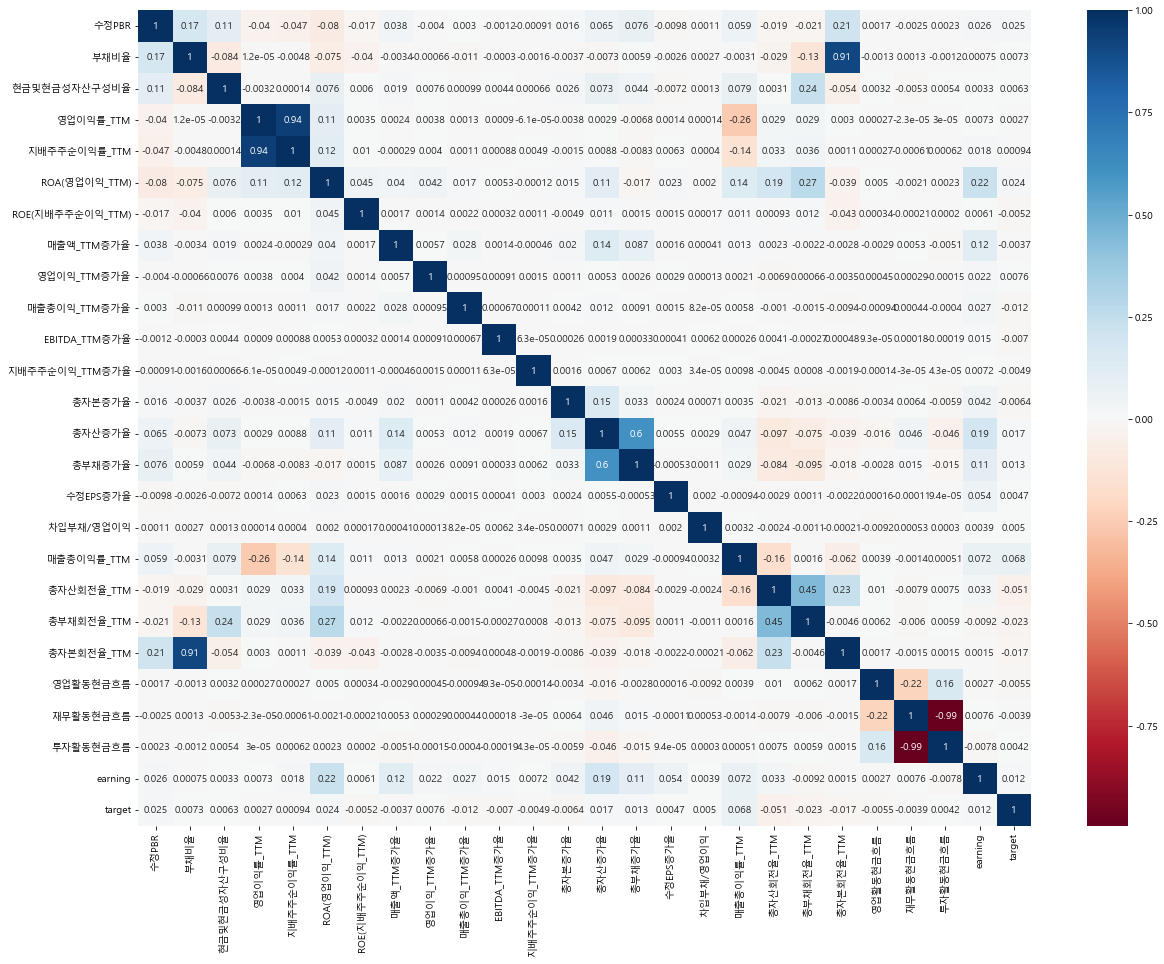

In [68]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.heatmap(model_data.corr(), annot = True,cmap = "RdBu")

In [69]:
from sklearn.metrics import *
def get_clf_eval(y_test, model,pred=None): 
    """
    이진분류모델 성능지표
    """
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    class_name= model.__class__.__name__
    print(confusion)
    print(f'-------{class_name} ------- \n정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1_score: {f1:.4f}')

In [70]:
X = train.drop(['Name','DATE','업종','수정PBR','target'],axis=1)
y = train['target']

In [71]:
## 학습 및 검증 데이터 분리
from sklearn.model_selection import train_test_split
train_X,valid_X,train_y,valid_y= train_test_split(X,y, test_size = 0.2,random_state = 42)

In [72]:
print('학습용 피처/레이블 데이터 세트: ', train_X.shape, train_y.shape)
print('검증용 피처/레이블 데이터 세트: ', valid_X.shape, valid_y.shape)

학습용 피처/레이블 데이터 세트:  (23595, 24) (23595,)
검증용 피처/레이블 데이터 세트:  (5899, 24) (5899,)


In [73]:
valid_y.value_counts()

0    3664
1    2235
Name: target, dtype: int64

In [74]:
scale_col = train_X.columns[:]

In [425]:
train.head(5)

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,차입부채/영업이익,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target
0,삼성전자,20114Q,반도체,1.72,53.78,9.43,9.48,8.11,10.79,14.65,...,93.622715,32.033990,105.905964,302.829817,162.862362,85.309174,11.575598,-78.589021,3,1
12,SK하이닉스,20114Q,반도체,1.65,118.89,7.22,3.55,-0.54,2.13,-0.72,...,1835.967705,16.265109,60.307006,111.032229,132.005756,83.745788,15.222623,-99.383950,-8,1
24,LG화학,20114Q,소재,2.45,57.46,9.02,12.43,9.43,20.16,24.78,...,89.639409,17.996138,148.346556,406.527450,233.584083,78.231803,2.200356,-79.632464,-1,0
36,삼성SDI,20114Q,하드웨어,1.00,35.04,8.89,2.02,5.88,1.34,5.26,...,692.352429,12.551136,63.839793,246.008491,86.212019,39.626862,35.508254,-116.221498,1,0
48,현대차,20114Q,자동차 및 부품,1.59,171.48,5.69,10.32,9.84,7.86,22.78,...,540.285327,24.288410,71.061301,112.502296,192.914278,42.316938,31.837192,-72.875769,3,1


스케일링

In [76]:
## 스케일링
from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()
train_X[scale_col] = mMscaler.fit_transform(train_X[scale_col])
valid_X[scale_col] = mMscaler.transform(valid_X[scale_col])

RFC

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc_opt = RandomForestClassifier(random_state=121)

rfc_opt.fit(train_X,train_y)
pred_opt = rfc_opt.predict(valid_X)

get_clf_eval(valid_y,rfc_opt,pred_opt)

[[3431  233]
 [1331  904]]
-------RandomForestClassifier ------- 
정확도: 0.7349, 정밀도: 0.7951, 재현율: 0.4045, f1_score: 0.5362


0.7887956952219063

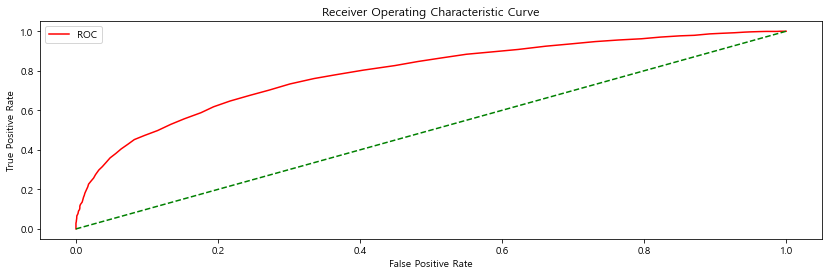

In [98]:
## ROC 곡선 시각화
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()

    
# ROC 곡선 시각화
prob_rfc = rfc_opt.predict_proba(valid_X)
probs_rfc = prob_rfc[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_rfc)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_rfc = roc_auc_score(valid_y, rfc_opt.predict_proba(valid_X)[:,1])
auc_rfc

XGB

In [85]:
## GridSearchCV로 탐색한 파라미터를 적용한 XGBoost 최적화
from xgboost import XGBClassifier


xgb_opt = XGBClassifier(random_state = 121)
                        

xgb_opt.fit(train_X,train_y)
pred_opt = xgb_opt.predict(valid_X)

get_clf_eval(valid_y,xgb_opt,pred_opt)

[[3089  575]
 [1355  880]]
-------XGBClassifier ------- 
정확도: 0.6728, 정밀도: 0.6048, 재현율: 0.3937, f1_score: 0.4770


0.697186605511757

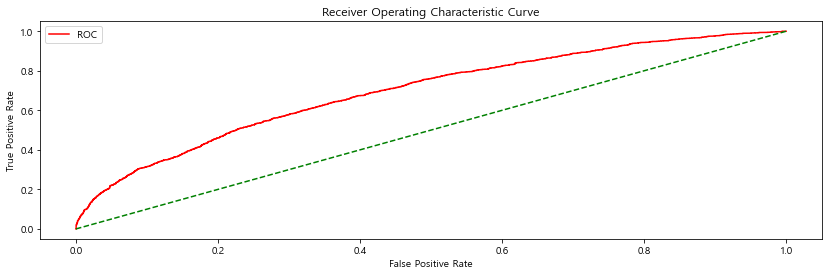

In [86]:
## ROC 곡선 시각화
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()

    
# ROC 곡선 시각화
prob_xgb = xgb_opt.predict_proba(valid_X)
probs_xgb = prob_xgb[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_xgb)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_xgb = roc_auc_score(valid_y, xgb_opt.predict_proba(valid_X)[:,1])
auc_xgb

LGBM

In [87]:
## GridSearchCV로 탐색한 파라미터를 적용한 LightGBM 최적화
from lightgbm import LGBMClassifier
lgbm_opt = LGBMClassifier(random_state = 121)
                        
lgbm_opt.fit(train_X,train_y)
pred_opt = lgbm_opt.predict(valid_X)

get_clf_eval(valid_y,lgbm_opt,pred_opt)


[[3324  340]
 [1593  642]]
-------LGBMClassifier ------- 
정확도: 0.6723, 정밀도: 0.6538, 재현율: 0.2872, f1_score: 0.3991


0.6852381964186278

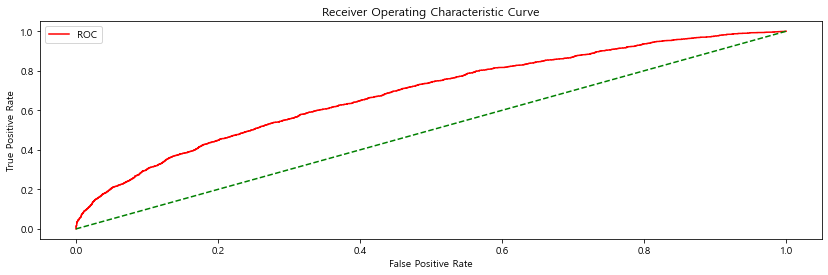

In [88]:
## ROC 곡선 시각화

prob_lgbm = lgbm_opt.predict_proba(valid_X)
probs_lgbm = prob_lgbm[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_lgbm)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_lgbm = roc_auc_score(valid_y, lgbm_opt.predict_proba(valid_X)[:,1])
auc_lgbm

In [89]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state = 121)
cat.fit(train_X,train_y)
cat_pred = cat.predict(valid_X)

#성능평가
get_clf_eval(valid_y,cat,cat_pred)

Learning rate set to 0.039731
0:	learn: 0.6900180	total: 162ms	remaining: 2m 41s
1:	learn: 0.6872310	total: 170ms	remaining: 1m 24s
2:	learn: 0.6844781	total: 179ms	remaining: 59.4s
3:	learn: 0.6818030	total: 188ms	remaining: 46.8s
4:	learn: 0.6795657	total: 197ms	remaining: 39.3s
5:	learn: 0.6774564	total: 207ms	remaining: 34.2s
6:	learn: 0.6752493	total: 216ms	remaining: 30.6s
7:	learn: 0.6733338	total: 225ms	remaining: 27.9s
8:	learn: 0.6714802	total: 234ms	remaining: 25.8s
9:	learn: 0.6698614	total: 244ms	remaining: 24.1s
10:	learn: 0.6682071	total: 254ms	remaining: 22.8s
11:	learn: 0.6666030	total: 263ms	remaining: 21.6s
12:	learn: 0.6652231	total: 276ms	remaining: 21s
13:	learn: 0.6638103	total: 288ms	remaining: 20.3s
14:	learn: 0.6625130	total: 299ms	remaining: 19.6s
15:	learn: 0.6611972	total: 313ms	remaining: 19.2s
16:	learn: 0.6601494	total: 322ms	remaining: 18.6s
17:	learn: 0.6591491	total: 332ms	remaining: 18.1s
18:	learn: 0.6582132	total: 341ms	remaining: 17.6s
19:	learn: 

171:	learn: 0.6119853	total: 1.68s	remaining: 8.07s
172:	learn: 0.6118111	total: 1.69s	remaining: 8.06s
173:	learn: 0.6116673	total: 1.7s	remaining: 8.07s
174:	learn: 0.6115102	total: 1.71s	remaining: 8.06s
175:	learn: 0.6113556	total: 1.72s	remaining: 8.05s
176:	learn: 0.6111793	total: 1.73s	remaining: 8.04s
177:	learn: 0.6109972	total: 1.74s	remaining: 8.03s
178:	learn: 0.6108550	total: 1.75s	remaining: 8.02s
179:	learn: 0.6106904	total: 1.76s	remaining: 8.01s
180:	learn: 0.6104524	total: 1.76s	remaining: 7.99s
181:	learn: 0.6103093	total: 1.77s	remaining: 7.98s
182:	learn: 0.6100651	total: 1.78s	remaining: 7.97s
183:	learn: 0.6098724	total: 1.79s	remaining: 7.96s
184:	learn: 0.6096380	total: 1.8s	remaining: 7.95s
185:	learn: 0.6094802	total: 1.81s	remaining: 7.93s
186:	learn: 0.6092400	total: 1.82s	remaining: 7.92s
187:	learn: 0.6091010	total: 1.83s	remaining: 7.9s
188:	learn: 0.6089438	total: 1.84s	remaining: 7.9s
189:	learn: 0.6088641	total: 1.85s	remaining: 7.88s
190:	learn: 0.60

334:	learn: 0.5821441	total: 3.13s	remaining: 6.22s
335:	learn: 0.5818008	total: 3.14s	remaining: 6.21s
336:	learn: 0.5816508	total: 3.15s	remaining: 6.2s
337:	learn: 0.5814785	total: 3.16s	remaining: 6.19s
338:	learn: 0.5811668	total: 3.17s	remaining: 6.18s
339:	learn: 0.5808745	total: 3.18s	remaining: 6.17s
340:	learn: 0.5806657	total: 3.19s	remaining: 6.16s
341:	learn: 0.5804312	total: 3.2s	remaining: 6.15s
342:	learn: 0.5801630	total: 3.21s	remaining: 6.14s
343:	learn: 0.5800337	total: 3.22s	remaining: 6.13s
344:	learn: 0.5798425	total: 3.23s	remaining: 6.12s
345:	learn: 0.5796485	total: 3.23s	remaining: 6.12s
346:	learn: 0.5794783	total: 3.24s	remaining: 6.11s
347:	learn: 0.5793190	total: 3.25s	remaining: 6.09s
348:	learn: 0.5791187	total: 3.26s	remaining: 6.09s
349:	learn: 0.5789347	total: 3.27s	remaining: 6.08s
350:	learn: 0.5787661	total: 3.28s	remaining: 6.07s
351:	learn: 0.5785614	total: 3.29s	remaining: 6.06s
352:	learn: 0.5783456	total: 3.3s	remaining: 6.05s
353:	learn: 0.5

501:	learn: 0.5514169	total: 4.62s	remaining: 4.59s
502:	learn: 0.5513090	total: 4.63s	remaining: 4.58s
503:	learn: 0.5511500	total: 4.64s	remaining: 4.57s
504:	learn: 0.5510068	total: 4.65s	remaining: 4.56s
505:	learn: 0.5508125	total: 4.66s	remaining: 4.55s
506:	learn: 0.5506700	total: 4.66s	remaining: 4.54s
507:	learn: 0.5504933	total: 4.67s	remaining: 4.52s
508:	learn: 0.5502901	total: 4.68s	remaining: 4.51s
509:	learn: 0.5501772	total: 4.68s	remaining: 4.5s
510:	learn: 0.5500225	total: 4.69s	remaining: 4.49s
511:	learn: 0.5498640	total: 4.7s	remaining: 4.48s
512:	learn: 0.5497357	total: 4.71s	remaining: 4.47s
513:	learn: 0.5496069	total: 4.72s	remaining: 4.46s
514:	learn: 0.5493948	total: 4.72s	remaining: 4.45s
515:	learn: 0.5492086	total: 4.73s	remaining: 4.44s
516:	learn: 0.5490917	total: 4.74s	remaining: 4.43s
517:	learn: 0.5489819	total: 4.74s	remaining: 4.41s
518:	learn: 0.5488437	total: 4.75s	remaining: 4.4s
519:	learn: 0.5486585	total: 4.76s	remaining: 4.39s
520:	learn: 0.5

661:	learn: 0.5276104	total: 5.91s	remaining: 3.02s
662:	learn: 0.5274492	total: 5.92s	remaining: 3.01s
663:	learn: 0.5273254	total: 5.93s	remaining: 3s
664:	learn: 0.5271413	total: 5.93s	remaining: 2.99s
665:	learn: 0.5270009	total: 5.94s	remaining: 2.98s
666:	learn: 0.5268987	total: 5.95s	remaining: 2.97s
667:	learn: 0.5267777	total: 5.96s	remaining: 2.96s
668:	learn: 0.5266490	total: 5.96s	remaining: 2.95s
669:	learn: 0.5264750	total: 5.97s	remaining: 2.94s
670:	learn: 0.5262784	total: 5.98s	remaining: 2.93s
671:	learn: 0.5260995	total: 5.99s	remaining: 2.92s
672:	learn: 0.5259298	total: 5.99s	remaining: 2.91s
673:	learn: 0.5257782	total: 6s	remaining: 2.9s
674:	learn: 0.5256198	total: 6.01s	remaining: 2.89s
675:	learn: 0.5255105	total: 6.01s	remaining: 2.88s
676:	learn: 0.5253913	total: 6.02s	remaining: 2.87s
677:	learn: 0.5252558	total: 6.03s	remaining: 2.86s
678:	learn: 0.5251206	total: 6.04s	remaining: 2.85s
679:	learn: 0.5249800	total: 6.04s	remaining: 2.84s
680:	learn: 0.52485

830:	learn: 0.5051256	total: 7.63s	remaining: 1.55s
831:	learn: 0.5050739	total: 7.64s	remaining: 1.54s
832:	learn: 0.5049327	total: 7.66s	remaining: 1.53s
833:	learn: 0.5047904	total: 7.67s	remaining: 1.53s
834:	learn: 0.5046224	total: 7.68s	remaining: 1.52s
835:	learn: 0.5044748	total: 7.69s	remaining: 1.51s
836:	learn: 0.5043611	total: 7.7s	remaining: 1.5s
837:	learn: 0.5042449	total: 7.72s	remaining: 1.49s
838:	learn: 0.5041467	total: 7.72s	remaining: 1.48s
839:	learn: 0.5040114	total: 7.74s	remaining: 1.47s
840:	learn: 0.5039121	total: 7.75s	remaining: 1.46s
841:	learn: 0.5038042	total: 7.76s	remaining: 1.46s
842:	learn: 0.5036987	total: 7.77s	remaining: 1.45s
843:	learn: 0.5036068	total: 7.78s	remaining: 1.44s
844:	learn: 0.5034173	total: 7.79s	remaining: 1.43s
845:	learn: 0.5032532	total: 7.8s	remaining: 1.42s
846:	learn: 0.5031019	total: 7.81s	remaining: 1.41s
847:	learn: 0.5029730	total: 7.82s	remaining: 1.4s
848:	learn: 0.5028471	total: 7.83s	remaining: 1.39s
849:	learn: 0.50

0.7140922501294413

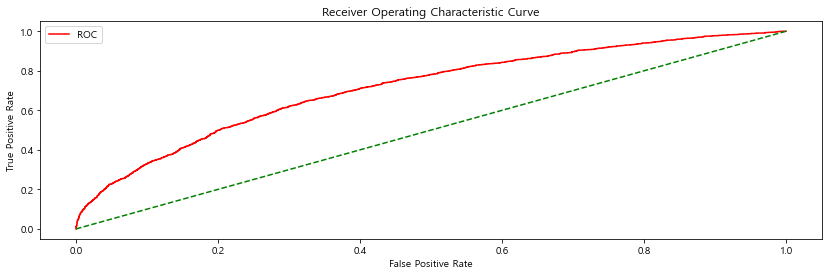

In [91]:
# ROC 곡선 시각화

prob_cat = cat.predict_proba(valid_X)
probs_cat = prob_cat[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_cat)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_cat = roc_auc_score(valid_y, cat.predict_proba(valid_X)[:,1])
auc_cat

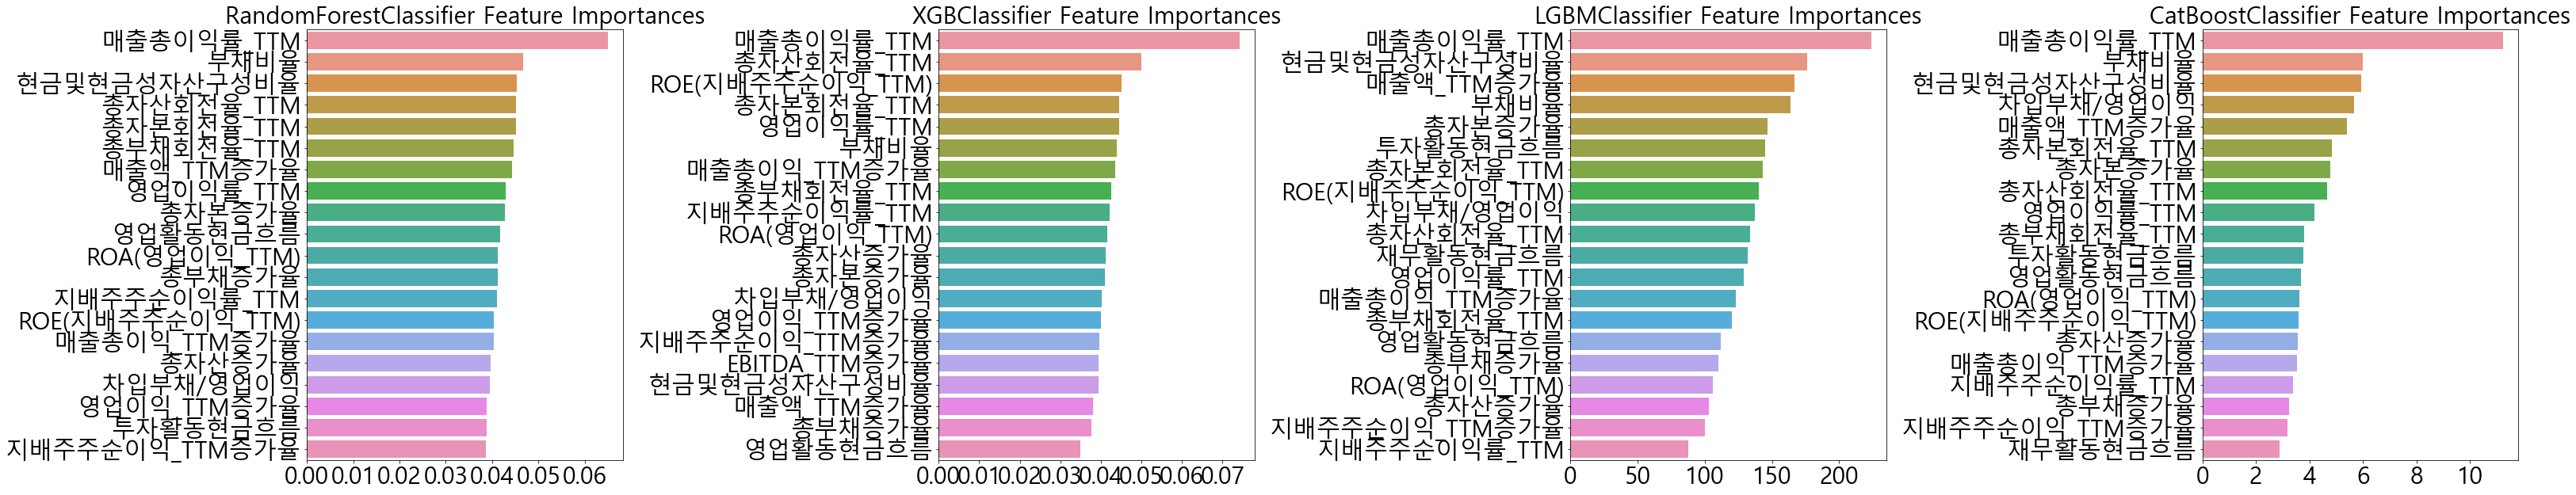

In [92]:
train_X = pd.DataFrame(train_X , columns = train_X.columns)
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20
def visualize_ftr_importances(models):
    # 3개 분류 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(50,10),nrows=1, ncols=4)
    plt.subplots_adjust(wspace = 1)
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=30)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(30)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])



models = [rfc_opt,xgb_opt,lgbm_opt,cat]
visualize_ftr_importances(models)

VOTING

In [93]:
from sklearn.ensemble import VotingClassifier

#개별모델 생성

rfc_opt = RandomForestClassifier(random_state=42)
xgb_opt = XGBClassifier(random_state = 42)
lgbm_opt = LGBMClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)
#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf= VotingClassifier(estimators = [('RFC',rfc_opt),('XGB',xgb_opt),('LGBM',lgbm_opt),('CAT',cat)],voting='soft')



#VotingClassifier 학습/예측/평가
vo_clf.fit(train_X,train_y)
pred=vo_clf.predict(valid_X)

get_clf_eval(valid_y,vo_clf,pred)


Learning rate set to 0.039731
0:	learn: 0.6899568	total: 12.1ms	remaining: 12.1s
1:	learn: 0.6870936	total: 23.4ms	remaining: 11.7s
2:	learn: 0.6844167	total: 34ms	remaining: 11.3s
3:	learn: 0.6818890	total: 45.6ms	remaining: 11.4s
4:	learn: 0.6793681	total: 56.6ms	remaining: 11.3s
5:	learn: 0.6771885	total: 67.1ms	remaining: 11.1s
6:	learn: 0.6750429	total: 76.9ms	remaining: 10.9s
7:	learn: 0.6730219	total: 87.5ms	remaining: 10.9s
8:	learn: 0.6712010	total: 98.3ms	remaining: 10.8s
9:	learn: 0.6696314	total: 110ms	remaining: 10.8s
10:	learn: 0.6680204	total: 120ms	remaining: 10.8s
11:	learn: 0.6666353	total: 130ms	remaining: 10.7s
12:	learn: 0.6651881	total: 142ms	remaining: 10.8s
13:	learn: 0.6639326	total: 152ms	remaining: 10.7s
14:	learn: 0.6625771	total: 163ms	remaining: 10.7s
15:	learn: 0.6615031	total: 175ms	remaining: 10.8s
16:	learn: 0.6602353	total: 188ms	remaining: 10.9s
17:	learn: 0.6592297	total: 201ms	remaining: 10.9s
18:	learn: 0.6583243	total: 212ms	remaining: 10.9s
19:	

167:	learn: 0.6133335	total: 1.92s	remaining: 9.49s
168:	learn: 0.6131014	total: 1.93s	remaining: 9.48s
169:	learn: 0.6128700	total: 1.94s	remaining: 9.46s
170:	learn: 0.6127143	total: 1.95s	remaining: 9.44s
171:	learn: 0.6125704	total: 1.96s	remaining: 9.43s
172:	learn: 0.6123451	total: 1.97s	remaining: 9.41s
173:	learn: 0.6121801	total: 1.98s	remaining: 9.39s
174:	learn: 0.6120397	total: 1.99s	remaining: 9.38s
175:	learn: 0.6118721	total: 2s	remaining: 9.38s
176:	learn: 0.6116863	total: 2.02s	remaining: 9.37s
177:	learn: 0.6115523	total: 2.03s	remaining: 9.36s
178:	learn: 0.6113187	total: 2.04s	remaining: 9.35s
179:	learn: 0.6110885	total: 2.05s	remaining: 9.34s
180:	learn: 0.6109283	total: 2.06s	remaining: 9.34s
181:	learn: 0.6107460	total: 2.07s	remaining: 9.32s
182:	learn: 0.6105677	total: 2.09s	remaining: 9.31s
183:	learn: 0.6103913	total: 2.1s	remaining: 9.31s
184:	learn: 0.6101783	total: 2.11s	remaining: 9.3s
185:	learn: 0.6100222	total: 2.12s	remaining: 9.29s
186:	learn: 0.609

329:	learn: 0.5830414	total: 3.63s	remaining: 7.38s
330:	learn: 0.5828050	total: 3.65s	remaining: 7.37s
331:	learn: 0.5825763	total: 3.66s	remaining: 7.36s
332:	learn: 0.5823242	total: 3.67s	remaining: 7.34s
333:	learn: 0.5821138	total: 3.67s	remaining: 7.33s
334:	learn: 0.5818575	total: 3.69s	remaining: 7.32s
335:	learn: 0.5816465	total: 3.69s	remaining: 7.3s
336:	learn: 0.5814919	total: 3.7s	remaining: 7.29s
337:	learn: 0.5813294	total: 3.71s	remaining: 7.27s
338:	learn: 0.5811595	total: 3.72s	remaining: 7.26s
339:	learn: 0.5809577	total: 3.73s	remaining: 7.25s
340:	learn: 0.5807013	total: 3.74s	remaining: 7.23s
341:	learn: 0.5805506	total: 3.75s	remaining: 7.22s
342:	learn: 0.5802929	total: 3.76s	remaining: 7.21s
343:	learn: 0.5801588	total: 3.77s	remaining: 7.19s
344:	learn: 0.5800234	total: 3.78s	remaining: 7.18s
345:	learn: 0.5798079	total: 3.79s	remaining: 7.16s
346:	learn: 0.5796486	total: 3.8s	remaining: 7.15s
347:	learn: 0.5794952	total: 3.81s	remaining: 7.13s
348:	learn: 0.5

496:	learn: 0.5528968	total: 5.35s	remaining: 5.42s
497:	learn: 0.5526938	total: 5.36s	remaining: 5.41s
498:	learn: 0.5524971	total: 5.37s	remaining: 5.4s
499:	learn: 0.5523262	total: 5.39s	remaining: 5.39s
500:	learn: 0.5522029	total: 5.4s	remaining: 5.38s
501:	learn: 0.5520518	total: 5.41s	remaining: 5.37s
502:	learn: 0.5518707	total: 5.42s	remaining: 5.36s
503:	learn: 0.5517504	total: 5.43s	remaining: 5.35s
504:	learn: 0.5516432	total: 5.44s	remaining: 5.33s
505:	learn: 0.5514942	total: 5.45s	remaining: 5.32s
506:	learn: 0.5512865	total: 5.46s	remaining: 5.31s
507:	learn: 0.5511381	total: 5.48s	remaining: 5.3s
508:	learn: 0.5509444	total: 5.49s	remaining: 5.29s
509:	learn: 0.5508151	total: 5.5s	remaining: 5.28s
510:	learn: 0.5506100	total: 5.51s	remaining: 5.27s
511:	learn: 0.5504224	total: 5.52s	remaining: 5.26s
512:	learn: 0.5502628	total: 5.53s	remaining: 5.25s
513:	learn: 0.5501196	total: 5.54s	remaining: 5.24s
514:	learn: 0.5499820	total: 5.55s	remaining: 5.23s
515:	learn: 0.54

663:	learn: 0.5274469	total: 7.13s	remaining: 3.61s
664:	learn: 0.5273165	total: 7.14s	remaining: 3.6s
665:	learn: 0.5272096	total: 7.15s	remaining: 3.59s
666:	learn: 0.5271046	total: 7.16s	remaining: 3.58s
667:	learn: 0.5269873	total: 7.17s	remaining: 3.56s
668:	learn: 0.5268487	total: 7.18s	remaining: 3.55s
669:	learn: 0.5267164	total: 7.19s	remaining: 3.54s
670:	learn: 0.5265540	total: 7.2s	remaining: 3.53s
671:	learn: 0.5264114	total: 7.21s	remaining: 3.52s
672:	learn: 0.5262516	total: 7.22s	remaining: 3.51s
673:	learn: 0.5261392	total: 7.23s	remaining: 3.5s
674:	learn: 0.5259936	total: 7.24s	remaining: 3.48s
675:	learn: 0.5258804	total: 7.25s	remaining: 3.47s
676:	learn: 0.5257862	total: 7.26s	remaining: 3.46s
677:	learn: 0.5256771	total: 7.27s	remaining: 3.45s
678:	learn: 0.5255033	total: 7.28s	remaining: 3.44s
679:	learn: 0.5253983	total: 7.29s	remaining: 3.43s
680:	learn: 0.5252790	total: 7.3s	remaining: 3.42s
681:	learn: 0.5251540	total: 7.31s	remaining: 3.41s
682:	learn: 0.52

834:	learn: 0.5043737	total: 8.88s	remaining: 1.75s
835:	learn: 0.5042804	total: 8.89s	remaining: 1.74s
836:	learn: 0.5041596	total: 8.9s	remaining: 1.73s
837:	learn: 0.5040634	total: 8.91s	remaining: 1.72s
838:	learn: 0.5039320	total: 8.92s	remaining: 1.71s
839:	learn: 0.5037885	total: 8.93s	remaining: 1.7s
840:	learn: 0.5036750	total: 8.94s	remaining: 1.69s
841:	learn: 0.5035353	total: 8.95s	remaining: 1.68s
842:	learn: 0.5034223	total: 8.96s	remaining: 1.67s
843:	learn: 0.5033345	total: 8.97s	remaining: 1.66s
844:	learn: 0.5032383	total: 8.98s	remaining: 1.65s
845:	learn: 0.5030913	total: 8.99s	remaining: 1.64s
846:	learn: 0.5029751	total: 9s	remaining: 1.63s
847:	learn: 0.5028748	total: 9.01s	remaining: 1.61s
848:	learn: 0.5027469	total: 9.02s	remaining: 1.6s
849:	learn: 0.5025363	total: 9.03s	remaining: 1.59s
850:	learn: 0.5023808	total: 9.04s	remaining: 1.58s
851:	learn: 0.5022264	total: 9.05s	remaining: 1.57s
852:	learn: 0.5021269	total: 9.06s	remaining: 1.56s
853:	learn: 0.5019

[[3352  312]
 [1467  768]]
-------VotingClassifier ------- 
정확도: 0.6984, 정밀도: 0.7111, 재현율: 0.3436, f1_score: 0.4633


0.7423221769584714

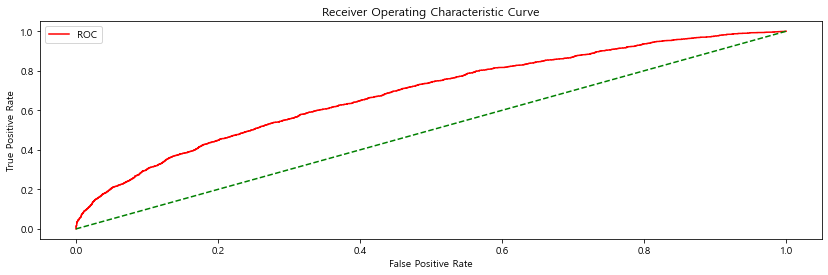

In [94]:
prob_vo = vo_clf.predict_proba(valid_X)
probs_vo = prob_vo[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_lgbm)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_vo = roc_auc_score(valid_y, vo_clf.predict_proba(valid_X)[:,1])
auc_vo

랜덤포레스트 모델의 성능이 가장 좋았음

# shap

In [99]:
import shap
## 개발한 모델(XGBoost)을 SHAP에 적합
shap.initjs()
explainer = shap.TreeExplainer(rfc_opt)
shap_values = explainer.shap_values(valid_X.iloc[0])

In [106]:
## 개별 데이터 예측 예시 (1) 상승 예측
shap.initjs() 
shap.force_plot(explainer.expected_value[0], shap_values[0], valid_X.iloc[0])

In [153]:
## 변수 중요도 및 영향
shap.initjs()
shap.summary_plot(shap_values[0], valid_X)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

# 테스트 데이터 검증

In [154]:
test

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,차입부채/영업이익,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target
0,삼성전자,20191Q,하드웨어,1.24,36.27,7.73,21.00,15.87,15.05,16.21,...,26.687745,43.448553,68.274464,256.490190,93.040739,89.183476,-19.294989,-78.876606,-5,1
12,SK하이닉스,20191Q,반도체,1.09,38.09,1.77,46.35,35.13,31.23,32.38,...,40.917453,58.724956,59.108157,214.288736,81.622407,98.997686,-1.398546,-108.930660,-5,0
24,LG화학,20191Q,소재,1.66,81.47,9.93,6.64,4.02,6.51,6.83,...,368.006758,18.331413,90.512710,201.606345,164.257265,104.040196,78.950721,-175.637095,-2,1
36,삼성SDI,20191Q,하드웨어,1.22,58.85,7.03,7.97,6.55,4.24,5.35,...,472.398438,22.974957,48.856142,131.867903,77.610171,37.495422,140.075304,-134.527243,1,1
48,현대차,20191Q,자동차 및 부품,0.48,146.15,4.90,2.61,1.70,1.43,2.44,...,2927.404477,15.846669,53.848785,90.692753,132.550724,65.514587,15.752689,-69.722650,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,참존글로벌,20193Q,자본재,0.07,169.66,4.30,-100.01,-199.69,-10.72,-49.17,...,-580.425202,38.146482,9.180024,14.590886,24.754777,74.136276,-153.037033,109.804373,9,0
22944,에이치엔티,20193Q,하드웨어,3.92,139.50,13.32,2.54,-5.01,4.36,-18.96,...,626.738780,8.880155,156.908851,269.388058,375.797200,-179.413707,-502.132256,741.129147,5,0
22956,파티게임즈,20193Q,소프트웨어,0.58,215.17,14.78,-2.55,25.88,-0.98,29.23,...,-2145.502841,100.000000,44.288140,64.870580,139.584875,35.372352,-96.632464,90.665848,5,0
22968,맘스터치,20193Q,소비자 서비스,3.19,65.54,18.14,7.11,6.45,14.52,22.38,...,109.913658,27.982087,192.737850,486.809085,319.060573,134.564970,-68.292379,-27.913298,1,1


종속/독립변수 분리 및 스케일링

In [155]:
test_X = test.drop(['Name','DATE','업종','수정PBR','target'],axis=1)
test_y = test['target']


test_X[scale_col] = mMscaler.transform(test_X[scale_col])

테스트 성능 평가

In [335]:
from sklearn.metrics import *


                  

rfc_opt = RandomForestClassifier(random_state=42)
xgb_opt = XGBClassifier(random_state = 42)
lgbm_opt = LGBMClassifier(random_state = 42)     
cat = CatBoostClassifier(random_state = 42)
#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf= VotingClassifier(estimators = [('RFC',rfc_opt),('XGB',xgb_opt),('LGBM',lgbm_opt),('CAT',cat)],voting='soft')

rfc_opt.fit(train_X,train_y)

            
pred_opt = rfc_opt.predict(test_X)

get_clf_eval(test_y,rfc_opt,pred_opt)

[[2544  301]
 [1217  517]]
-------RandomForestClassifier ------- 
정확도: 0.6685, 정밀도: 0.6320, 재현율: 0.2982, f1_score: 0.4052


-------RandomForestClassifier ------- 
- 정확도: 0.6685, 정밀도: 0.6320, 재현율: 0.2982, f1_score: 0.4052

-------XGBClassifier ------- 
- 정확도: 0.6344, 정밀도: 0.5251, 재현율: 0.3622, f1_score: 0.4287

-------LGBMClassifier ------- 
- 정확도: 0.6517, 정밀도: 0.5834, 재현율: 0.2803, f1_score: 0.3787

-------CatBoostClassifier ------- 
- 정확도: 0.6547, 정밀도: 0.5811, 재현율: 0.3160, f1_score: 0.4094

-------VotingClassifier ------- 
- 정확도: 0.6569, 정밀도: 0.5913, 재현율: 0.3045, f1_score: 0.4020


In [163]:
test_df = test.copy()
test_df['pred_y'] = pred_opt

In [164]:
test_df

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target,pred_y
0,삼성전자,20191Q,하드웨어,1.24,36.27,7.73,21.00,15.87,15.05,16.21,...,43.448553,68.274464,256.490190,93.040739,89.183476,-19.294989,-78.876606,-5,1,0
12,SK하이닉스,20191Q,반도체,1.09,38.09,1.77,46.35,35.13,31.23,32.38,...,58.724956,59.108157,214.288736,81.622407,98.997686,-1.398546,-108.930660,-5,0,0
24,LG화학,20191Q,소재,1.66,81.47,9.93,6.64,4.02,6.51,6.83,...,18.331413,90.512710,201.606345,164.257265,104.040196,78.950721,-175.637095,-2,1,0
36,삼성SDI,20191Q,하드웨어,1.22,58.85,7.03,7.97,6.55,4.24,5.35,...,22.974957,48.856142,131.867903,77.610171,37.495422,140.075304,-134.527243,1,1,0
48,현대차,20191Q,자동차 및 부품,0.48,146.15,4.90,2.61,1.70,1.43,2.44,...,15.846669,53.848785,90.692753,132.550724,65.514587,15.752689,-69.722650,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,참존글로벌,20193Q,자본재,0.07,169.66,4.30,-100.01,-199.69,-10.72,-49.17,...,38.146482,9.180024,14.590886,24.754777,74.136276,-153.037033,109.804373,9,0,0
22944,에이치엔티,20193Q,하드웨어,3.92,139.50,13.32,2.54,-5.01,4.36,-18.96,...,8.880155,156.908851,269.388058,375.797200,-179.413707,-502.132256,741.129147,5,0,0
22956,파티게임즈,20193Q,소프트웨어,0.58,215.17,14.78,-2.55,25.88,-0.98,29.23,...,100.000000,44.288140,64.870580,139.584875,35.372352,-96.632464,90.665848,5,0,1
22968,맘스터치,20193Q,소비자 서비스,3.19,65.54,18.14,7.11,6.45,14.52,22.38,...,27.982087,192.737850,486.809085,319.060573,134.564970,-68.292379,-27.913298,1,1,0


In [165]:
test_df['target'].value_counts()

0    2845
1    1734
Name: target, dtype: int64

In [166]:
test_df['pred_y'].value_counts()

0    3686
1     893
Name: pred_y, dtype: int64

In [167]:
## 랜덤포레스트 모델이 지속상승으로 예측한 것
df_stat = test_df[test_df['pred_y'] == 1]

In [168]:
df_stat

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target,pred_y
60,NAVER,20191Q,소프트웨어,3.06,80.15,30.47,15.41,10.59,9.26,12.16,...,100.000000,53.126205,119.412836,95.704831,107.885980,90.010742,-51.929611,1,1,1
96,셀트리온,20191Q,제약 및 바이오,8.58,32.48,11.51,29.74,23.83,8.12,9.07,...,54.831912,27.374728,111.651571,36.266562,109.143468,-66.079998,-66.677901,-3,1,1
120,KB금융,20191Q,은행,0.47,1269.62,0.53,9.52,6.66,0.89,8.46,...,63.534840,2.891026,3.118733,39.596152,96.518352,95.088718,-204.598749,1,1,1
144,신한지주,20191Q,은행,0.55,1231.45,0.00,17.75,12.32,0.98,9.38,...,62.457113,2.774084,2.999354,36.935553,-113.970981,462.974755,-333.005195,3,1,1
192,LG전자,20191Q,내구 소비재 및 의류,0.91,171.18,8.91,4.08,1.79,5.73,7.59,...,24.563248,133.082441,210.827416,360.890554,122.919984,21.838447,-133.964213,-3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22620,스카이문스테크놀로지,20193Q,하드웨어,0.72,31.48,39.43,-165.90,-180.84,-25.89,-42.99,...,22.285348,23.693389,98.968723,31.151033,39.678405,153.900884,-147.473955,-11,1,1
22740,우리금융캐피탈,20193Q,기타금융,0.80,799.82,1.91,17.66,14.27,1.87,13.06,...,100.000000,3.035851,3.415417,27.317249,-867.866583,845.877732,-1.609736,3,1,1
22812,피앤텔,20193Q,하드웨어,3.79,460.78,2.74,-54.13,218.56,-28.55,623.25,...,-12.205899,64.945622,79.040379,364.201135,26.979187,-4.278925,-24.867580,5,1,1
22836,제낙스,20193Q,소재,19.41,397.48,14.18,-141.48,-160.07,-12.94,-27.55,...,-15.011414,15.312607,19.165061,76.176656,149.508621,-169.352967,-62.885458,4,0,1


In [306]:
## 수익률 계산할 날짜 20193Q에 1(지속상승)으로 예측된다면 20194Q에 구매하여 3년동안의 수익률을 볼 예정
test_date = '20193Q' 

In [307]:
bh_list = df_stat[(df_stat['pred_y'] == 1) & (df_stat['DATE'] == test_date)]['Name'].unique()

In [308]:
print(bh_list)

['NAVER' '카카오' '셀트리온' 'KB금융' '신한지주' '포스코케미칼' '삼성생명' 'KT&G' '하나금융지주'
 '셀트리온헬스케어' '엔씨소프트' '삼성에스디에스' 'LG생활건강' 'KT' '삼성화재' '기업은행' '아모레퍼시픽'
 'CJ제일제당' 'LG유플러스' '메리츠화재' '메리츠금융지주' '오리온' '코웨이' 'DB손해보험' '삼성카드' '메리츠증권'
 'BGF리테일' '롯데지주' 'NH투자증권' '한국금융지주' 'GS리테일' '삼성증권' '펄어비스' '제일기획' '호텔신라'
 '현대해상' '이마트' '셀트리온제약' '에스원' '아모레G' '키움증권' 'CJ' '영원무역' '신세계' '한화생명' '농심'
 '휠라홀딩스' '하이트진로' '대웅제약' '오스템임플란트' 'SK케미칼' '휴젤' 'LX세미콘' '현대백화점' 'DGB금융지주'
 '케어젠' '대웅' '아프리카TV' '종근당' '현대바이오' '아이에스동서' '코리안리' '오리온홀딩스' 'F&F홀딩스'
 '다우데이타' '메가스터디교육' '덴티움' '한국콜마' '더블유게임즈' '다우기술' '이노션' '네오위즈' '신세계인터내셔날'
 '동양생명' 'NHN' '선광' '삼천당제약' '하나투어' '메디톡스' '에스티큐브' 'NICE평가정보' 'CJ CGV'
 '한올바이오파마' '영원무역홀딩스' '보령' '대신증권' '동국제약' '우리종금' '골프존' '안랩' '다원시스' '인텔리안테크'
 '한세실업' '위메이드맥스' '현대홈쇼핑' '넵튠' '하이드로리튬' '쿠쿠홀딩스' '한화투자증권' '동원F&B' '유안타증권'
 '코미코' '동아에스티' '바텍' 'NICE' '코웰패션' 'LF' '한화손해보험' '애경산업' 'DI동일' '흥아해운'
 '스카이라이프' '한국자산신탁' '대원제약' '휴온스' 'KG이니시스' '잇츠한불' '교보증권' '휴림로봇' '한국토지신탁'
 '이엔플러스' '바이넥스' '한글과컴퓨터' '일양약품' '도화엔지니어링' '스마트솔루션즈' '오킨스전자' 'SM C&C' '디오'
 '사람인

지속상승 종목들의 3년 수익률

In [309]:
valid_data = df_test[df_test['Name'].isin(bh_list)]
rate = rate_of_return(valid_data,'20194Q','20223Q')
rate = np.where(rate == 0, np.nan, rate)
np.array([x for x in rate if not np.isnan(x)]).mean()

0.06781684589617294

모든 종목들의 3년 수익률

In [310]:
rate = rate_of_return(df_test,'20194Q','20223Q')
rate = np.where(rate == 0, np.nan, rate)
np.array([x for x in rate if not np.isnan(x)]).mean()

0.14682004581085126

시장 수익률 : 코스피 : 4.48 / 코스닥 : 8.18

가치평가 기준으로 S인 그룹의 수익률 : 40%

In [311]:
a = df_var[df_var['DATE'] == '20193Q']

b = a[a['Name'].isin(bh_list)]

x = valid_data[valid_data['DATE'] == '20194Q' ]['수정주가(보통)']

y = valid_data[(valid_data['DATE'] == '20223Q')]['수정주가(보통)']

In [312]:
v = (y.values-x.values)/x.values
v = np.where(v == 0, np.nan, v)

In [313]:
b['수익률'] = v
b.groupby('SMB').describe()['수익률']

,count,mean,std,min,25%,50%,75%,max
SMB,,,,,,,,
B,202.0,-0.050023,0.462073,-0.738393,-0.361365,-0.121610,0.085352,2.244857
S,94.0,0.321048,1.538385,-0.866602,-0.357100,-0.014087,0.354265,8.569892


## 지속상승으로 예측된 종목들의 미래 재무제표 추세

In [413]:
s_group = list(b[(b['SMB'] == 'B')]['Name'].values)

In [414]:
df_earn = df_test[df_test['Name'].isin(s_group)]

In [415]:
df_매출액 = pd.pivot_table(df_earn, index='DATE', columns="Name", values='매출액')
df_순이익 = pd.pivot_table(df_earn, index='DATE', columns="Name", values='지배주주순이익')
df_매출총이익 = pd.pivot_table(df_earn, index='DATE', columns="Name", values= '매출총이익')

In [416]:
df_매출액 = df_매출액.rolling(window=4).sum()
df_순이익 = df_순이익.rolling(window=4).sum()
df_매출총이익 = df_매출총이익.rolling(window=4).sum()

In [417]:
drop_date = list(df_매출액.index[:-13])

In [418]:
drop_date

['20101Q',
 '20102Q',
 '20103Q',
 '20104Q',
 '20111Q',
 '20112Q',
 '20113Q',
 '20114Q',
 '20121Q',
 '20122Q',
 '20123Q',
 '20124Q',
 '20131Q',
 '20132Q',
 '20133Q',
 '20134Q',
 '20141Q',
 '20142Q',
 '20143Q',
 '20144Q',
 '20151Q',
 '20152Q',
 '20153Q',
 '20154Q',
 '20161Q',
 '20162Q',
 '20163Q',
 '20164Q',
 '20171Q',
 '20172Q',
 '20173Q',
 '20174Q',
 '20181Q',
 '20182Q',
 '20183Q',
 '20184Q',
 '20191Q',
 '20192Q']

In [408]:
drop_date.append('20224Q')

In [409]:
drop_date

['20101Q',
 '20102Q',
 '20103Q',
 '20104Q',
 '20111Q',
 '20112Q',
 '20113Q',
 '20114Q',
 '20121Q',
 '20122Q',
 '20123Q',
 '20124Q',
 '20131Q',
 '20132Q',
 '20133Q',
 '20134Q',
 '20141Q',
 '20142Q',
 '20143Q',
 '20144Q',
 '20151Q',
 '20152Q',
 '20153Q',
 '20154Q',
 '20161Q',
 '20162Q',
 '20163Q',
 '20164Q',
 '20171Q',
 '20172Q',
 '20173Q',
 '20174Q',
 '20181Q',
 '20182Q',
 '20183Q',
 '20184Q',
 '20191Q',
 '20192Q',
 '20193Q',
 '20224Q']

In [419]:
df_sales = df_매출액.copy()
df_oper = df_순이익.copy()
df_gross_sales = df_매출총이익.copy()
# def processing(df1,df2,df3,drop_date):

# TTM을 증가율로 변환
df_sales = increase_rate(df_sales)
df_oper = increase_rate(df_oper)
df_gross_sales = increase_rate(df_gross_sales)

# 세 변수를 가지는 공통 종목으로 설정
col_list = list(set(df_sales.columns)&set(df_oper.columns)&set(df_gross_sales.columns))
df_sales = df_sales[col_list]
df_oper = df_oper[col_list]
df_gross_sales = df_gross_sales[col_list]

# 증가율을 이익성장레이블링으로 카테고리화
df_sales_label = process(df_sales)
df_oper_label = process(df_oper)
df_gross_sales_label = process(df_gross_sales)

# 매출액 이익성장레이블과 영업이익 이익성장레이블을 합하여 데이터 구축
df_fin_label = df_sales_label.add(df_oper_label).add(df_gross_sales_label)
df_cumsum = df_fin_label.cumsum()

In [420]:
df_cumsum

Name,기업은행,한화생명,LG유플러스,삼성에스디에스,슈피겐코리아,현대백화점,LX세미콘,KT,셀트리온제약,KG이니시스,...,위메이드플레이,F&F홀딩스,코미코,다나와,코데즈컴바인,이크레더블,경농,제낙스,NICE평가정보,티웨이홀딩스
DATE,,,,,,,,,,,,,,,,,,,,,
20193Q,1,0,-2,3,4,1,0,1,12,-6,...,-5,5,-5,-3,5,1,-6,4,3,-9
20194Q,-3,-3,2,6,5,2,3,4,17,-15,...,-6,11,-11,-2,6,4,1,-8,6,-14
20201Q,-7,-1,6,0,8,-4,8,1,22,-23,...,3,0,-15,2,1,7,5,-17,9,-29
20202Q,-12,2,10,-5,11,-10,11,-2,25,-22,...,9,-11,-15,6,-5,10,6,-26,12,-41
20203Q,-17,6,15,-5,23,-8,17,-5,29,-21,...,14,-23,-9,7,-11,11,10,-28,15,-52
20204Q,-19,6,9,-8,23,-11,20,-2,37,-13,...,12,-34,-7,8,-7,6,14,-23,18,-63
20211Q,-19,10,12,-3,26,-5,32,1,46,-9,...,6,-22,-2,5,-2,7,17,-18,21,-74
20212Q,-18,9,15,1,23,4,44,5,58,-5,...,4,-7,4,-3,2,10,16,-7,24,-65
20213Q,-15,11,15,4,11,10,53,8,63,-1,...,7,4,6,-8,3,13,20,-6,27,-65


<AxesSubplot:title={'center':'이익성장레이블링(누적합)'}, xlabel='DATE'>

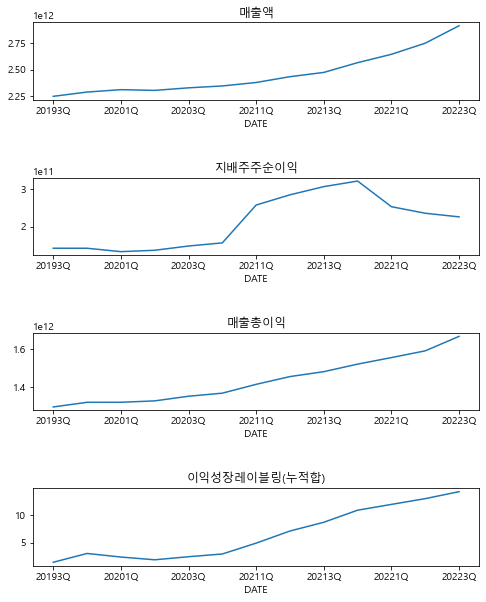

In [421]:
fig,ax = plt.subplots(4,1)
fig.set_size_inches((8,10))
plt.subplots_adjust(wspace = 0.3,hspace = 1)

df_매출액.mean(axis =1).drop(drop_date,axis = 0).plot(ax= ax[0],title = '매출액')
df_순이익.mean(axis =1).drop(drop_date,axis = 0).plot(ax = ax[1],title = '지배주주순이익')
df_매출총이익.mean(axis =1).drop(drop_date,axis = 0).plot(ax = ax[2],title = '매출총이익')
df_cumsum.mean(axis =1).plot(ax = ax[3],title = '이익성장레이블링(누적합)')

# 제일 최근 분기 예측해보기

In [368]:
test_2022 = df_train[df_train['DATE'] == '20222Q']

In [369]:
test_2022['SMB'] = test_2022['시가총액'].apply(lambda x : 'S' if x <= test_2022['시가총액'].median()
                                                        else 'B')

In [370]:
import numpy as np
test_2022[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']] = test_2022[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']].astype('float64')

test_2022 = test_2022[['Name','DATE','업종','수정PBR','부채비율', '현금및현금성자산구성비율',
       '영업이익률_TTM', '지배주주순이익률_TTM', 'ROA(영업이익_TTM)','ROE(지배주주순이익_TTM)',
       '매출액_TTM증가율', '영업이익_TTM증가율', '매출총이익_TTM증가율', 'EBITDA_TTM증가율',
       '지배주주순이익_TTM증가율', '총자본증가율', '총자산증가율', '총부채증가율', '수정EPS증가율', '차입부채/영업이익',
        '매출총이익률_TTM', '총자산회전율_TTM', '총부채회전율_TTM', '총자본회전율_TTM',
       '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름','SMB','earning']]

test_2022 = test_2022.replace([np.inf, -np.inf], np.nan)

test_2022 = test_2022.dropna(axis=0)

In [371]:
test_2022_x = test_2022.drop(['Name','DATE','업종','SMB','수정PBR'],axis=1)

In [372]:
test_2022_x

,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),매출액_TTM증가율,영업이익_TTM증가율,매출총이익_TTM증가율,EBITDA_TTM증가율,...,수정EPS증가율,차입부채/영업이익,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning
11,36.64,8.83,18.95,14.66,13.91,15.10,0.186175,0.335707,0.228264,0.284413,...,0.159123,30.117751,40.697365,68.192432,254.324214,93.175848,78.163320,-13.237392,-57.858427,3
23,84.67,1.36,31.22,24.79,5.77,7.69,0.555563,0.646333,0.708850,0.576914,...,0.193388,347.833961,44.984960,13.140787,28.661561,24.266538,79.329397,531.677798,-593.360440,4
35,56.00,4.37,30.80,22.89,16.98,18.88,0.436476,1.459245,0.915804,0.693035,...,0.446975,137.011102,47.132570,48.151447,134.132098,75.117536,91.113048,10.382520,-96.121237,4
47,81.53,7.96,7.44,4.89,5.97,8.62,0.211859,-0.262314,-0.005829,-0.084615,...,-0.557573,466.017916,21.883978,68.456763,152.418101,124.272077,46.048316,245.572382,-276.408471,-3
59,79.72,8.61,8.67,9.40,5.34,10.29,0.269848,0.476265,0.285910,0.294298,...,0.424123,348.416088,22.258486,55.634154,125.419634,99.986632,91.879905,16.320523,-87.997762,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,36.06,22.09,-4.47,16.76,-4.50,47.93,-0.215396,-1.940404,-0.717728,-1.032865,...,7.602975,-225.774450,3.415956,157.991136,596.118807,214.963568,19.653336,-60.374009,26.078562,-9
24407,93.38,10.46,-7.68,8.24,-3.55,7.93,-0.052962,0.794292,0.934257,0.935889,...,0.731134,-937.519188,28.026082,48.915529,101.300844,94.591095,18.968674,-123.372439,106.143711,2
24455,7.09,34.33,40.48,221.17,7.73,45.45,3.378485,0.320751,13.450862,0.145594,...,2.872766,6.612563,72.497389,15.772536,238.116063,16.891404,-83.236984,-5.652940,141.800905,8
24467,37.68,14.54,-222.05,-468.82,-12.62,-38.01,1.064328,0.582889,-0.805214,0.355536,...,-1.213445,-104.861631,71.198764,9.180362,33.545233,12.639401,4.189158,21.672453,-47.350645,-12


In [373]:
test_2022_x[scale_col] = mMscaler.transform(test_2022_x[scale_col])

In [374]:
pred = rfc_opt.predict(test_2022_x)

In [375]:
test_2022['pred'] = pred

In [383]:
test_2022

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,SMB,earning,pred
11,삼성전자,20222Q,하드웨어,1.21,36.64,8.83,18.95,14.66,13.91,15.10,...,40.697365,68.192432,254.324214,93.175848,78.163320,-13.237392,-57.858427,B,3,0
23,삼성바이오로직스,20222Q,제약 및 바이오,6.63,84.67,1.36,31.22,24.79,5.77,7.69,...,44.984960,13.140787,28.661561,24.266538,79.329397,531.677798,-593.360440,B,4,0
35,SK하이닉스,20222Q,반도체,0.96,56.00,4.37,30.80,22.89,16.98,18.88,...,47.132570,48.151447,134.132098,75.117536,91.113048,10.382520,-96.121237,B,4,0
47,LG화학,20222Q,소재,1.30,81.53,7.96,7.44,4.89,5.97,8.62,...,21.883978,68.456763,152.418101,124.272077,46.048316,245.572382,-276.408471,B,-3,0
59,삼성SDI,20222Q,하드웨어,2.36,79.72,8.61,8.67,9.40,5.34,10.29,...,22.258486,55.634154,125.419634,99.986632,91.879905,16.320523,-87.997762,B,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,연이비앤티,20222Q,디스플레이,0.89,36.06,22.09,-4.47,16.76,-4.50,47.93,...,3.415956,157.991136,596.118807,214.963568,19.653336,-60.374009,26.078562,S,-9,0
24407,뉴로스,20222Q,자본재,1.57,93.38,10.46,-7.68,8.24,-3.55,7.93,...,28.026082,48.915529,101.300844,94.591095,18.968674,-123.372439,106.143711,S,2,0
24455,참존글로벌,20222Q,유통,2.60,7.09,34.33,40.48,221.17,7.73,45.45,...,72.497389,15.772536,238.116063,16.891404,-83.236984,-5.652940,141.800905,S,8,0
24467,에이치엔티,20222Q,하드웨어,0.10,37.68,14.54,-222.05,-468.82,-12.62,-38.01,...,71.198764,9.180362,33.545233,12.639401,4.189158,21.672453,-47.350645,S,-12,1


In [378]:
stock_2022 = test_2022[(test_2022['pred'] == 1) & (test_2022['SMB'] == 'S')]

In [381]:
print(stock_2022['Name'].values)

['한미글로벌' '케이프' '미투온' '국보디자인' '매커스' '제노포커스' '케이피에스' '네오셈' '극동유화' 'SV인베스트먼트'
 '매일홀딩스' '인피니트헬스케어' '잉크테크' '야스' '나이스디앤비' '쎌바이오텍' '팜젠사이언스' '이스트소프트' 'JTC'
 '유유제약' '흥국에프엔비' '한컴위드' '케이사인' '액토즈소프트' '유비벨록스' '한스바이오메드' '룽투코리아' '웅진'
 '브이원텍' '지투알' '한국전자인증' '이엠넷' 'iMBC' 'SBI핀테크솔루션즈' '상상인증권' '한일단조' '텔코웨어'
 '이루온' '한솔로지스틱스' '지니언스' '코스맥스비티아이' '아이티센' '비씨월드제약' '나우IB' '흥국' '코이즈'
 '제넨바이오' 'EG' '클라우드에어' '시티랩스' 'CS홀딩스' '바른손이앤에이' '에이프로젠 H&G' '이글루' '메가엠디'
 '포시에스' '원익' '케이비아이동국실업' '유테크' 'SG&G' 'MH에탄올' '얼라인드' '비피도' '인산가' '코원플레이'
 '디모아' '린드먼아시아' '배럴' '이노인스트루먼트' '디케이앤디' 'SGA솔루션즈' '아이오케이' '딜리' '지엔코'
 '에스폴리텍' '지란지교시큐리티' '디와이디' '네오펙트' '엘아이에스' '에이치엔티']


In [384]:
stock_2022

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,SMB,earning,pred
5039,한미글로벌,20222Q,자본재,0.84,108.73,14.79,6.61,4.97,7.41,11.75,...,32.024129,97.674596,187.508223,203.874544,99.267913,113.931055,-173.701339,S,4,1
10751,케이프,20222Q,자본재,0.66,1224.39,0.18,2.73,-0.94,0.46,-2.41,...,20.056787,16.186205,17.508181,214.369203,27372.061851,-23980.982209,572.223917,S,-5,1
11399,미투온,20222Q,소프트웨어,1.28,33.32,26.92,24.74,7.64,12.31,8.18,...,65.180902,48.587803,194.402756,64.778011,170.377827,-179.953253,24.983446,S,-3,1
11879,국보디자인,20222Q,자본재,0.62,53.48,15.54,7.73,6.08,9.46,11.50,...,14.585137,119.366606,342.559504,183.205494,123.030210,-12.676424,-16.044336,S,1,1
12047,매커스,20222Q,반도체,1.25,260.07,12.46,19.21,12.01,13.80,25.26,...,27.899347,52.544917,72.749260,189.197137,50.997657,-7.718241,1.793315,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22475,지란지교시큐리티,20222Q,소프트웨어,0.84,48.50,16.32,1.55,-9.14,0.97,-14.51,...,37.309175,61.408375,188.025896,91.190893,-405.727093,-238.910304,1164.844648,S,3,1
22859,디와이디,20222Q,생활용품,2.07,6.04,46.79,-84.23,-304.31,-10.80,-66.96,...,20.233233,18.166893,318.903876,19.264317,30.583456,-177.607964,64.395157,S,2,1
23075,네오펙트,20222Q,의료장비 및 서비스,3.90,299.73,3.94,-24.82,-12.54,-12.31,-32.85,...,27.552299,49.773758,66.380059,198.959717,-3807.606987,973.003808,2136.079119,S,4,1
23543,엘아이에스,20222Q,디스플레이,2.58,1090.57,0.08,-254.22,-178.30,-43.90,-241.41,...,-79.468515,23.810666,25.993985,283.483170,73.436394,55.645635,-128.881230,S,-11,1
